In [1]:
from util.VisualizeDataset import VisualizeDataset
from Chapter3.DataTransformation import LowPassFilter
from Chapter3.DataTransformation import PrincipalComponentAnalysis
from Chapter3.ImputationMissingValues import ImputationMissingValues
from Chapter3.KalmanFilters import KalmanFilters
from scipy.signal import argrelextrema
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# Let is create our visualization class again.
DataViz = VisualizeDataset()

dataset_path = 'intermediate_datafiles/'
try:
    dataset = pd.read_csv(dataset_path + 'all_data_converted.csv', index_col=0)
except IOError as e:
    print('File not found, try to run previous crowdsignals scripts first!')
    raise e
    
dataset.index = pd.to_datetime(dataset.index, format='%Y-%m-%d %H:%M:%S.%f'[:-3])
milliseconds_per_instance = (dataset.index[1] - dataset.index[0]).microseconds/1000

In [3]:
acc_r = (dataset['acc_x']**2+dataset['acc_y']**2+dataset['acc_z']**2)
gyr_r = (dataset['gyr_x']**2+dataset['gyr_y']**2+dataset['gyr_z']**2)

In [4]:
dataset['acc_r'] = np.sqrt(acc_r)
dataset['gyr_r'] = np.sqrt(gyr_r)

In [5]:
squat = dataset[(dataset.labelSquat == 1)]
bench = dataset[(dataset.labelBenchPress == 1)]
ohp = dataset[(dataset.labelOHP == 1)]
deadlift = dataset[(dataset.labelDeadlift == 1)]
row = dataset[(dataset.labelRow == 1)]

In [10]:
# Determine the sampling frequency.
LowPass = LowPassFilter()
fs = float(1000)/milliseconds_per_instance
cutoff = 0.4

util\VisualizeDataset.py:36: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plot.hold(True)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\__init__.py:910: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\davee\Anaconda3\envs\ml4qs\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


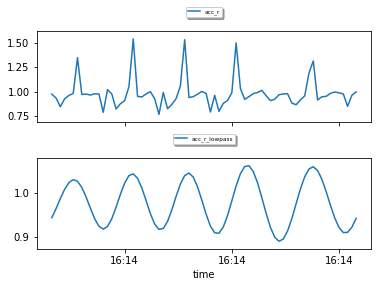

In [11]:
new_dataset = LowPass.low_pass_filter(copy.deepcopy(bench), 'acc_r', fs, cutoff, order=10)
DataViz.plot_dataset(new_dataset[new_dataset['set'] == new_dataset['set'].unique()[3]], ['acc_r', 'acc_r_lowpass'], ['exact','exact'], ['line', 'line'])

In [12]:
df = LowPass.low_pass_filter(bench, 'acc_r', fs, cutoff, order=10)

Chapter3\DataTransformation.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_table[col + '_lowpass'] = filtfilt(b, a, data_table[col])


bench = acc_r, 0,4
squat = acc_r, 0.4
row = gyr_x, 0.6


In [35]:
def count_reps_acc(data, cutoff=0.4):
    #apply lowpass filter with a cut off at 0.4Hz
    data = LowPass.low_pass_filter(data, 'acc_r', fs, cutoff, order=10)
    indexes = argrelextrema(data['acc_r_lowpass'].values, np.less) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['acc_r_lowpass'])
    plot.plot(peaks['acc_r_lowpass'], 'o', color='red')
    ax.set_ylabel('acc_r_lowpass')
    plot.show   

In [21]:
def count_reps_gyr(data, cutoff=0.6):
    #apply lowpass filter with a cut off at 0.4Hz
    data = LowPass.low_pass_filter(data, 'gyr_x', fs, cutoff, order=10)
    indexes = argrelextrema(data['gyr_x_lowpass'].values, np.greater) 
    peaks = data.iloc[indexes]
    print len(peaks)
    
    fig, ax = plot.subplots(figsize=(8,6))
    plot.plot(data['gyr_x_lowpass'])
    plot.plot(peaks['gyr_x_lowpass'], 'o', color='red')
    ax.set_ylabel('gyr_x_lowpass')
    plot.show   

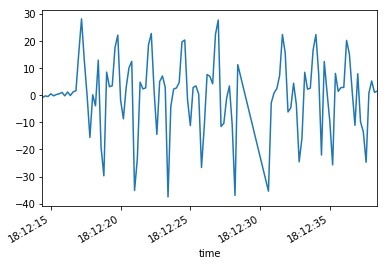

In [14]:
bench[(bench['participant'] == 'D') & (bench['set'] == 56)]['gyr_x'].plot()

6
7
10
10
4
5
5
6
5
5
11
9
5


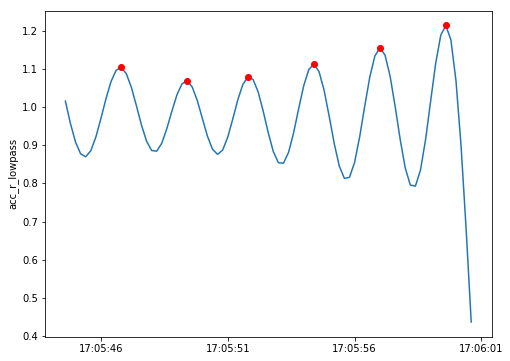

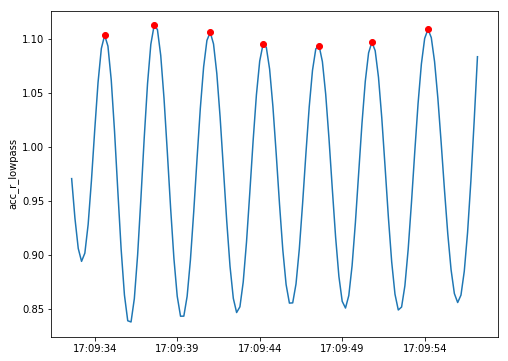

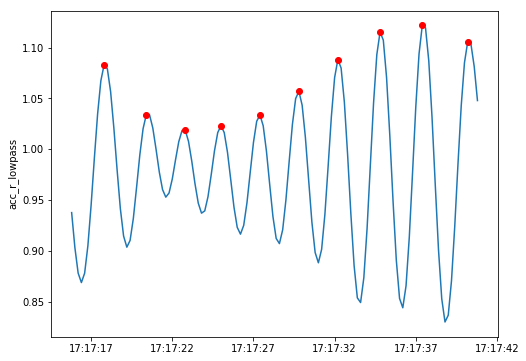

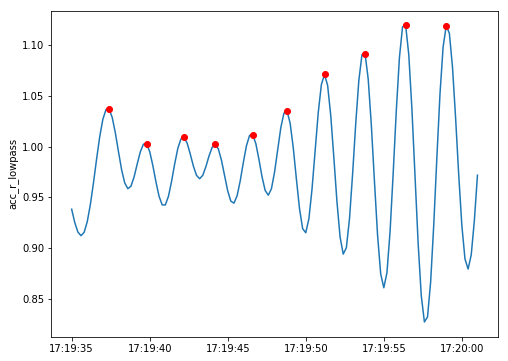

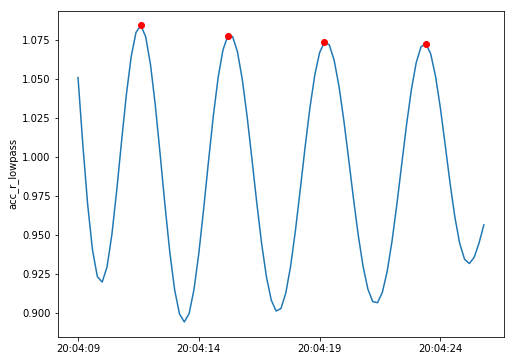

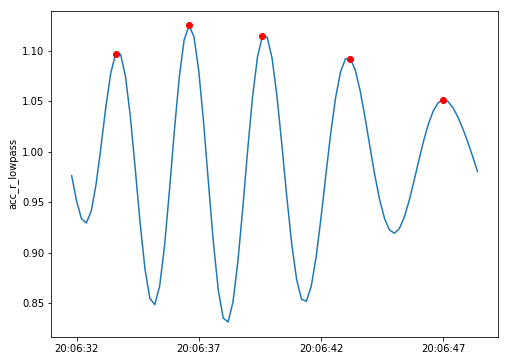

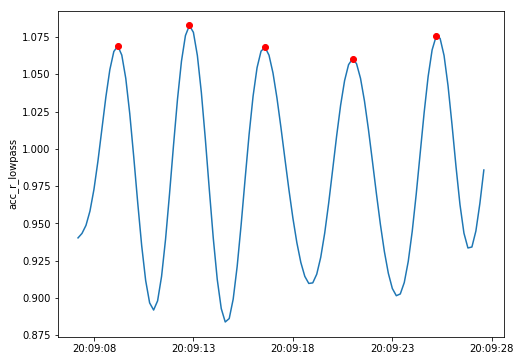

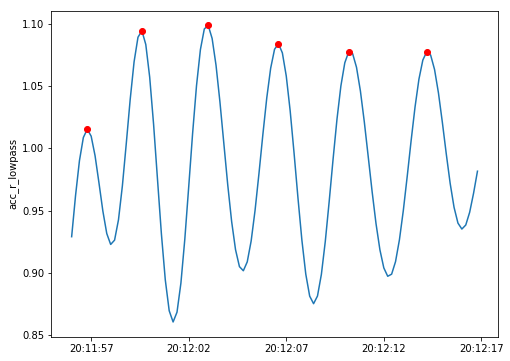

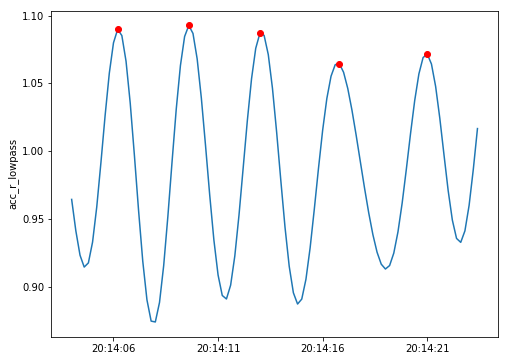

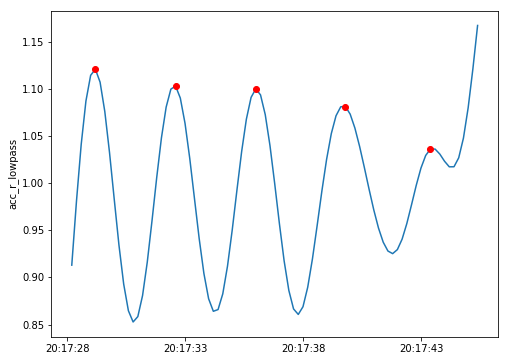

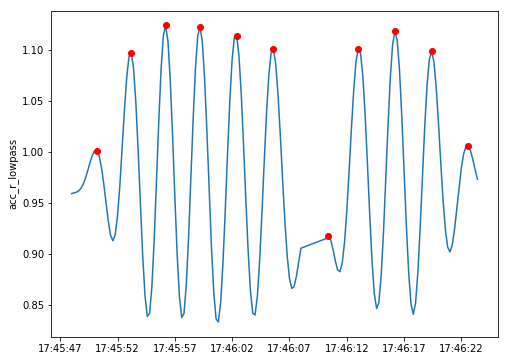

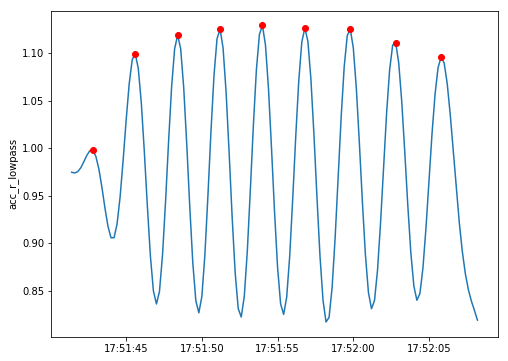

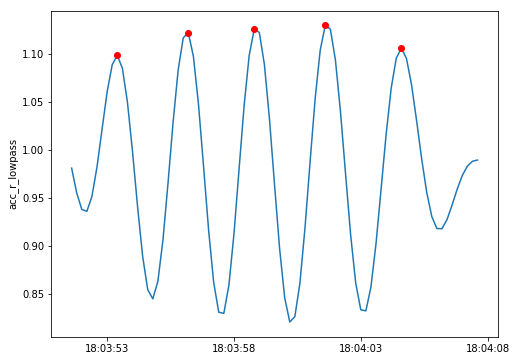

In [34]:
exercise = squat
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_acc(data)

10
11
10


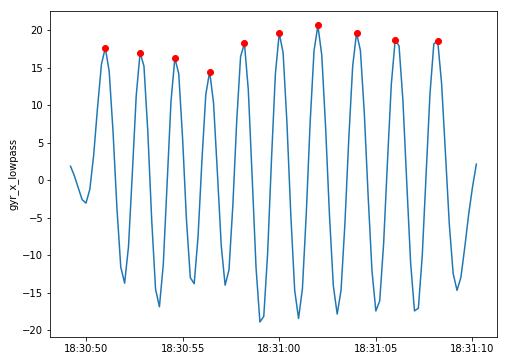

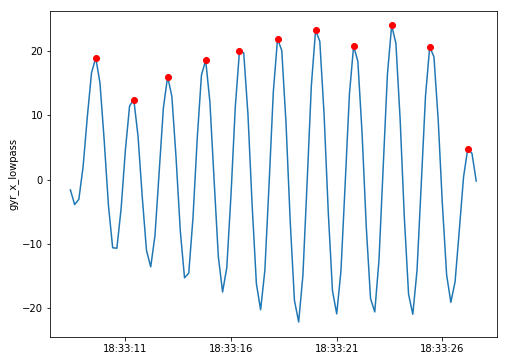

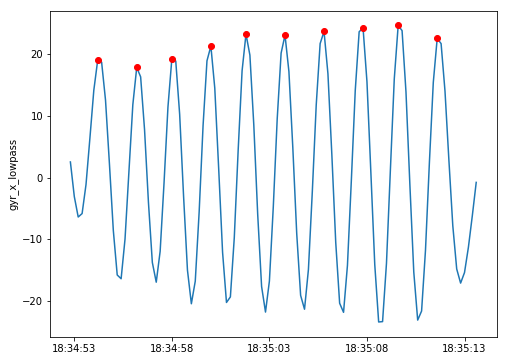

In [22]:
exercise = row[row['participant'] == 'D']
for sets in range (len(exercise.set.unique())):
    data = exercise[exercise.set == exercise.set.unique()[sets]]
    count_reps_gyr(data)